In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, LassoLars, Ridge, LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

import seaborn as sns
from matplotlib import pyplot as plt

In /home/vipulgaurav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/vipulgaurav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/vipulgaurav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/vipulgaurav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/vipulgaurav/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
full_df = pd.read_csv("train.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.count

<bound method DataFrame.count of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0    

In [4]:
test_df.count

<bound method DataFrame.count of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000004  P00128942      M  46-50           7             B   
1       1000009  P00113442      M  26-35          17             C   
2       1000010  P00288442      F  36-45           1             B   
3       1000010  P00145342      F  36-45           1             B   
4       1000011  P00053842      F  26-35           1             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               1    

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train_df.fillna(999, inplace=True)

In [7]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,999.0,999.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,999.0,999.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,999.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,999.0,999.0,7969


In [8]:
y = train_df.Purchase
y = np.array(y)
train_df.drop(["Purchase"], axis=1, inplace=True)

In [9]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [10]:
train_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [11]:
train_df = train_df.applymap(str)
train_df.dtypes
df = train_df.copy()

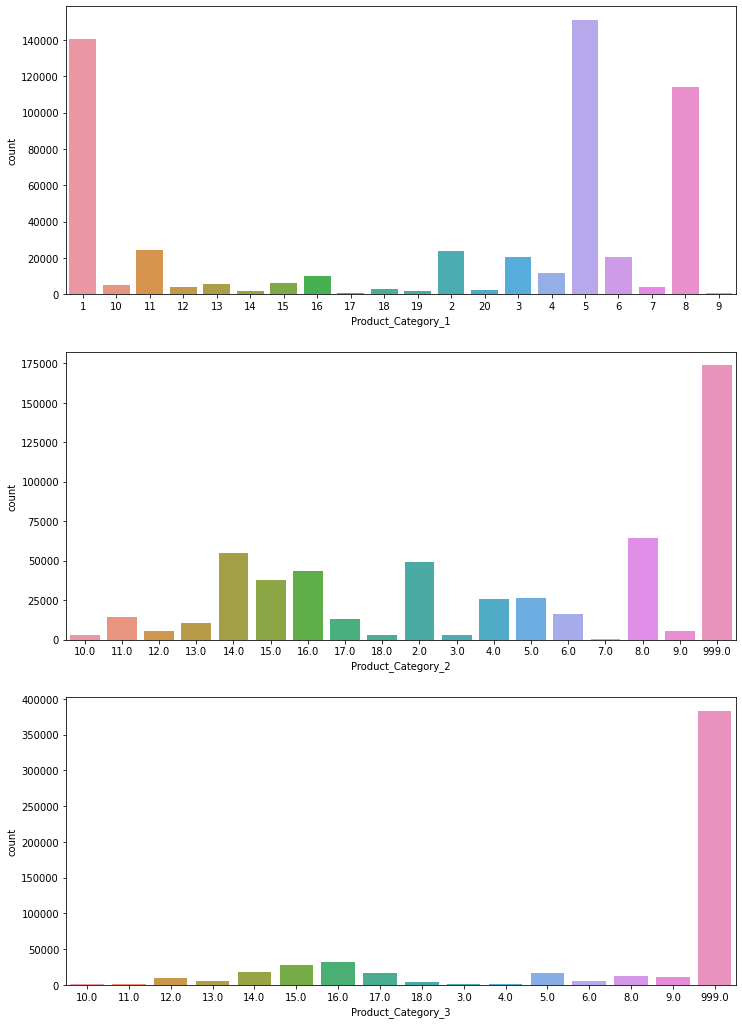

In [12]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.countplot('Product_Category_1', data=train_df, ax=ax[0])
sns.countplot('Product_Category_2', data=train_df, ax=ax[1])
sns.countplot('Product_Category_3', data=train_df, ax=ax[2])

In [66]:
'''From the above plots, we observe that:
    1. Product Category 2 has many NULL values
    2. Product Category 3 has many NULL values
    3. Product Category 1 has the highest number especially 1 and 5 values'''

'From the above plots, we observe that:\n    1. Product Category 2 has many NULL values\n    2. Product Category 3 has many NULL values\n    3. Product Category 1 has the highest number especially 1 and 5 values'

In [67]:
train_df.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20,18,16
top,1001680,P00265242,M,26-35,4,B,1,0,5,999.0,999.0
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,173638,383247


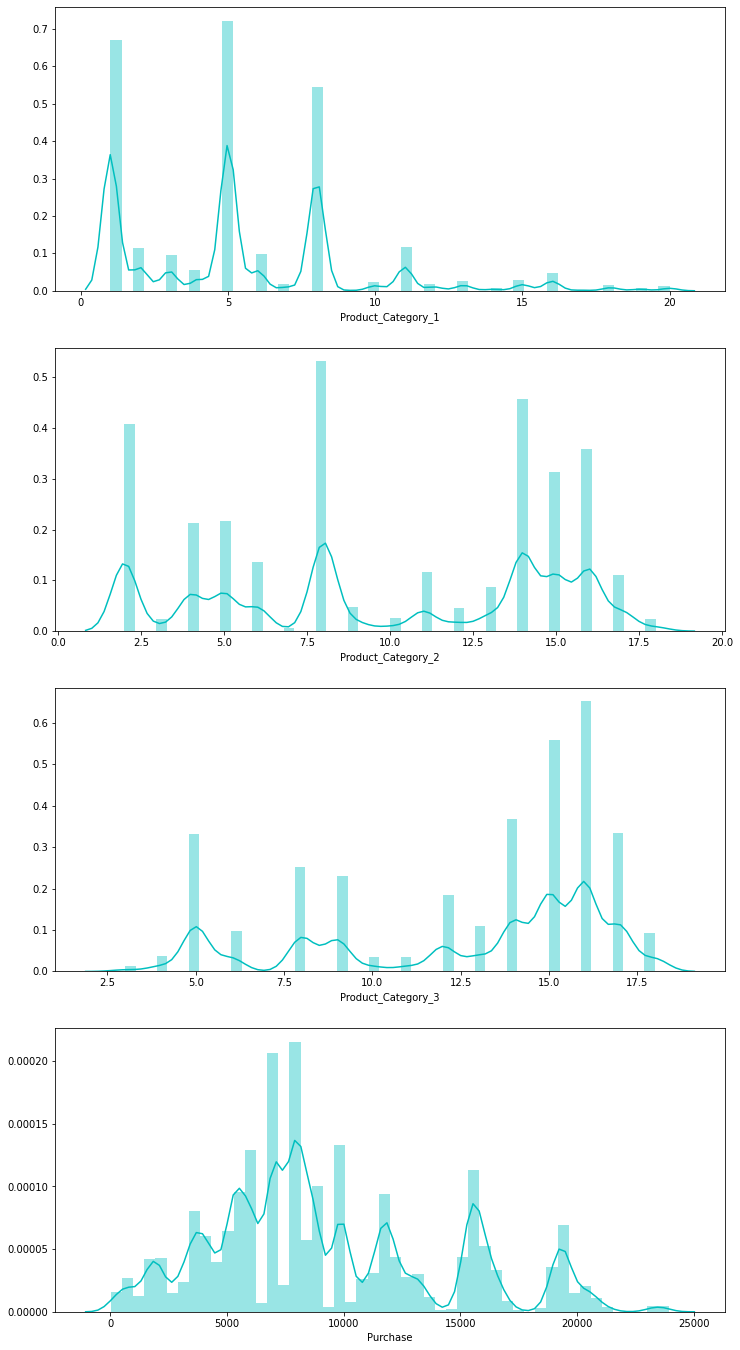

In [70]:
f, ax = plt.subplots(4, figsize=(12,24))
sns.distplot(train_df.Product_Category_1, color='c', ax=ax[0])
sns.distplot(train_df.Product_Category_2, color='c', ax=ax[1])
sns.distplot(train_df.Product_Category_3, color='c', ax=ax[2])
sns.distplot(full_df.Purchase, color='c', ax=ax[3])

In [71]:
# We observe that the prices are mostly in range between 5000 and 10000

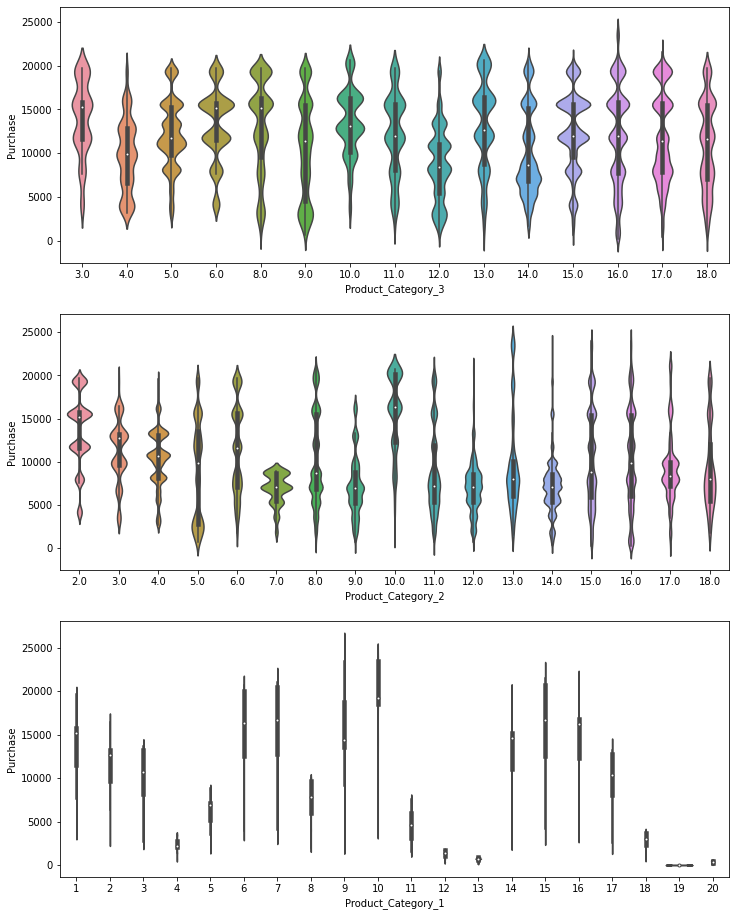

In [72]:
f, ax = plt.subplots(3, figsize=(12,16))
sns.violinplot(x='Product_Category_1', y='Purchase', data=full_df, ax=ax[2])
sns.violinplot(x='Product_Category_2', y='Purchase', data=full_df, ax=ax[1])
sns.violinplot(x='Product_Category_3', y='Purchase', data=full_df, ax=ax[0])

In [73]:
# We can observe the variation of prices with the Product of each category

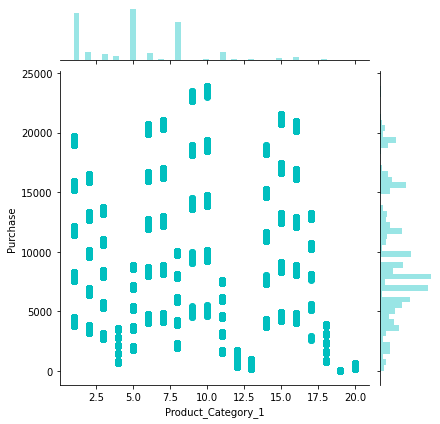

In [75]:
sns.jointplot(x='Product_Category_1', y='Purchase', data=full_df, color='c')

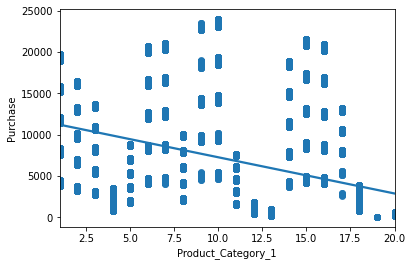

In [76]:
sns.regplot(full_df['Product_Category_1'], full_df['Purchase'])

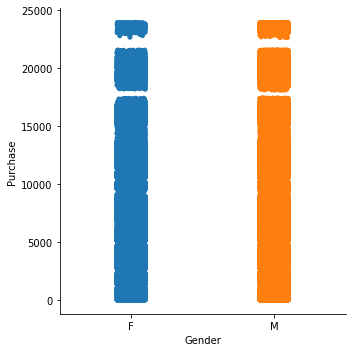

In [77]:
sns.catplot(x="Gender", y="Purchase", data=full_df);

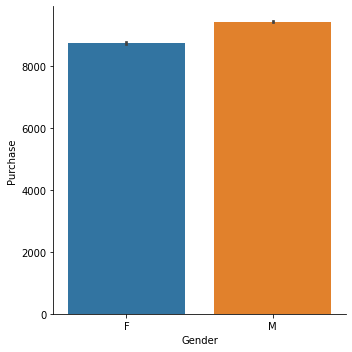

In [78]:
sns.catplot(x="Gender", y="Purchase", kind="bar", data=full_df)

In [79]:
# Thus, male and female are almost equal in variation to Purchase Prices

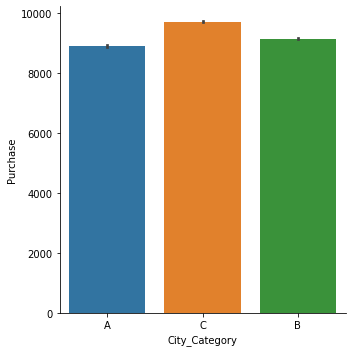

In [88]:
sns.catplot(x="City_Category", y="Purchase", kind="bar", data=full_df)

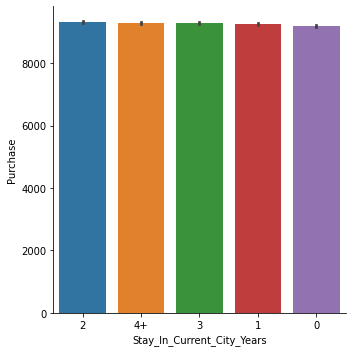

In [100]:
sns.catplot(x="Stay_In_Current_City_Years", y="Purchase", kind="bar", data=full_df)

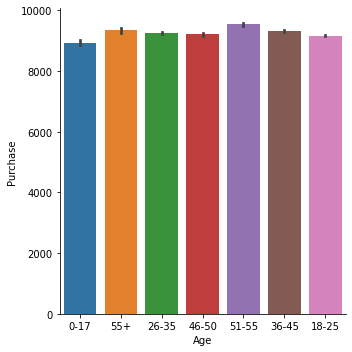

In [101]:
sns.catplot(x="Age", y="Purchase", kind="bar", data=full_df)

In [13]:
le = LabelEncoder()
train_df.Gender = le.fit_transform(train_df.Gender)
train_df.User_ID = le.fit_transform(train_df.User_ID)
train_df.Product_ID = le.fit_transform(train_df.Product_ID)
train_df.City_Category = le.fit_transform(train_df.City_Category)
train_df.Stay_In_Current_City_Years = le.fit_transform(train_df.Stay_In_Current_City_Years)
train_df.Age = le.fit_transform(train_df.Age)

In [14]:
# Drop very negligible influential features
train_df.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)
test_df.drop(['Product_Category_2', 'Product_Category_3'], inplace=True, axis=1)

In [15]:
x = train_df.drop(['User_ID', 'Product_ID'], axis=1)
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,0,0,10,0,2,0,3
1,0,0,10,0,2,0,1
2,0,0,10,0,2,0,12
3,0,0,10,0,2,0,12
4,1,6,16,2,4,0,8


In [16]:
y = full_df.Purchase
y.dtype

dtype('int64')

In [17]:
x_train,x_, y_train,y_ = train_test_split(x,y,test_size=0.30,random_state=25)
x_dev,x_test,y_dev,y_test = train_test_split(x_,y_,test_size=0.5,random_state=25)

In [18]:
sc = StandardScaler()
sc.fit(x_train)
sc.transform(x_train)
sc.transform(x_dev)

array([[ 0.57336874, -1.10543704,  1.21631639, ..., -0.66436471,
        -0.83310005, -1.11869153],
       [ 0.57336874,  0.37051699, -0.93132949, ..., -0.66436471,
         1.20033602,  1.41946678],
       [ 0.57336874, -1.10543704, -1.23813604, ..., -0.66436471,
        -0.83310005, -0.61105986],
       ...,
       [ 0.57336874, -0.36746003,  1.06291311, ..., -0.66436471,
        -0.83310005, -1.11869153],
       [-1.74407834, -0.36746003,  0.14249345, ...,  0.88612631,
         1.20033602, -1.11869153],
       [-1.74407834, -1.10543704, -0.62452293, ..., -1.43961022,
        -0.83310005, -1.11869153]])

In [122]:
clf = LinearRegression()
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.124
Training MSE: 22115603.995
Dev set score: 0.125
Dev set MSE: 22048009.891
Coefficients: [ 508.13774584  121.14237636    8.0611412   346.11425415    1.06586068
  -43.32224982 -436.54943753]
 Intercept: 10530.096338466048


In [123]:
clf = ElasticNet(alpha=1)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.122
Training MSE: 22159919.062
Dev set score: 0.123
Dev set MSE: 22096450.829
Coefficients: [ 136.27993521   96.98668103   11.87059557  186.63459953    3.06265912
   -5.72976771 -424.57754996]
 Intercept: 10922.1720314814


In [124]:
clf = Ridge(alpha=10)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.124
Training MSE: 22115603.997
Dev set score: 0.125
Dev set MSE: 22048010.376
Coefficients: [ 508.06580919  121.14062042    8.06177845  346.09853718    1.06630073
  -43.31613799 -436.54906421]
 Intercept: 10530.160786428338


In [125]:
clf = LassoLars(alpha=1)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.102
Training MSE: 22660623.374
Dev set score: 0.103
Dev set MSE: 22598098.914
Coefficients: [   0.            0.            0.            0.            0.
    0.         -280.03138656]
 Intercept: 10779.338392907532


In [126]:
clf = Lasso(alpha=40)
clf.fit(x_train,y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

Training score: 0.124
Training MSE: 22128106.104
Dev set score: 0.125
Dev set MSE: 22061814.805
Coefficients: [ 291.33284329   97.83071868    9.4468033   280.00859624    0.
   -0.         -434.78723717]
 Intercept: 10784.014276542348


In [128]:
# We observe that Linear Models clearly fail to converge to solution

In [26]:
clf = RandomForestRegressor(n_estimators=25, random_state=0)
clf.fit(x_train, y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))

Training score: 0.697
Training MSE: 7656055.896
Dev set score: 0.656
Dev set MSE: 8659387.840


In [27]:
clf = AdaBoostRegressor(n_estimators=25, random_state=0)
clf.fit(x_train, y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))

Training score: 0.479
Training MSE: 13158710.831
Dev set score: 0.479
Dev set MSE: 13123841.015


In [28]:
clf = GradientBoostingRegressor(n_estimators=40, random_state=0)
clf.fit(x_train, y_train)
print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))

Training score: 0.623
Training MSE: 9510394.434
Dev set score: 0.623
Dev set MSE: 9508251.261
